# Why don't people hit the subscribe button?

## 1. ASK
### Define the problem & ask the right question

- People spend a lot of time watching videos on YouTube. Korean smartphone users spend the longest time on YouTube than any other app. As of September, it was more than 2.5 times that of Kakao Talk, the most widely used mobile messaging app in Korea. (https://news.naver.com/main/read.naver?oid=031&aid=0000629492)


- 'Subscription' is a convenient function that shortens the search time of YouTube users and enables them to watch the video they like asap. However, people do not always subscribe to the YouTube channel that uploaded the video they found interesting, whether they watched it accidentally or out of necessity.


- Is the number of views proportional to the number of subscribers of the channel? Is there a difference in this depending on the type of channel? 

## 2. PREPARE
### Collect data

In [1]:
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

- Crawl data from www.youtube-rank.com/

In [2]:
browser = webdriver.Chrome('c:/YS/chromedriver.exe')
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube" 
browser.get(url)

html = browser.page_source
soup = BeautifulSoup(html, 'html.parser')

In [3]:
channel_list = soup.select('tr') 
print(len(channel_list), '\n')
print(channel_list[0])

102 

<tr>
<th class="rank"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=rank&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">순위 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="td_img">이미지</th>
<th class="subject">제목</th>
<th class="subscriber_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=subscriber_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">구독자순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="view_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=view_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">View순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="video_cnt"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=video_cnt&amp;sod=desc&amp;sfl=&amp;stx=&amp;sca=&amp;page=1">Video순 <i aria-hidden="true" class="fa fa-sort"></i></a></th>
<th class="hit"><a href="/board/bbs/board.php?bo_table=youtube&amp;sop=and&amp;sst=wr_hit&

In [4]:
channel_list = soup.select('form > table > tbody > tr')
print(len(channel_list))

100


In [5]:
channel = channel_list[0]
print(channel)

<tr class="aos-init aos-animate" data-aos="fade-up" data-aos-duration="800">
<td class="rank">
                        1                    </td>
<td class="td_img">
<div class="info_img"><a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203"><img class="lazyload" data-src="https://yt3.ggpht.com/ytc/AKedOLS48A09N2xyM8i9JeIfYCWsd-13csflXwYa8XAmoA=s88-c-k-c0x00ffffff-no-rj-mo" height="88" src="https://yt3.ggpht.com/ytc/AKedOLS48A09N2xyM8i9JeIfYCWsd-13csflXwYa8XAmoA=s88-c-k-c0x00ffffff-no-rj-mo" width="88"/></a></div>
<p class="info_rank">1</p>
</td>
<td class="subject">
<h1>
<p <a="" class="category" href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;sca=%EC%9D%8C%EC%95%85%2F%EB%8C%84%EC%8A%A4%2F%EA%B0%80%EC%88%98">[음악/댄스/가수]
                                
                                </p>
<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
								
								BLACKPINK							</a>
<span>
<i class="

In [6]:
category = channel.select('p.category')[0].text.strip()
print(category)

[음악/댄스/가수]


In [7]:
title = channel.select('h1 > a')[0].text.strip()
print(title)

BLACKPINK


In [8]:
subscriber = channel.select('.subscriber_cnt')[0].text
view = channel.select('.view_cnt')[0].text
video = channel.select('.video_cnt')[0].text

print(subscriber)
print(view)
print(video)

7040만
215억3740만
395개


In [9]:
channel_list = soup.select('tbody > tr') 
for channel in channel_list:
    title = channel.select('h1 > a')[0].text.strip()
    category = channel.select('p.category')[0].text.strip()
    subscriber = channel.select('.subscriber_cnt')[0].text
    view = channel.select('.view_cnt')[0].text
    video = channel.select('.video_cnt')[0].text 
    print(title, category, subscriber, view, video)

BLACKPINK [음악/댄스/가수] 7040만 215억3740만 395개
HYBE LABELS [음악/댄스/가수] 6310만 205억6338만 728개
BANGTANTV [음악/댄스/가수] 6170만 141억6115만 1,647개
SMTOWN [음악/댄스/가수] 2940만 230억6671만 3,781개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2460만 69억4022만 3,409개
1theK (원더케이) [음악/댄스/가수] 2370만 213억8537만 15,706개
JYP Entertainment [음악/댄스/가수] 2310만 150억5889만 1,429개
Mnet K-POP [음악/댄스/가수] 1910만 140억0484만 26,901개
JFlaMusic [음악/댄스/가수] 1740만 35억0639만 281개
KBS WORLD TV [TV/방송] 1720만 129억2744만 54,050개
Jane ASMR 제인 [음식/요리/레시피] 1550만 55억2648만 1,305개
officialpsy [음악/댄스/가수] 1530만 88억5136만 91개
AdeleVEVO [미분류] 1520만 105억3893만 49개
BIGBANG [음악/댄스/가수] 1390만 68억4229만 773개
TWICE [음악/댄스/가수] 1260만 27억1784만 707개
Saturday Night Live [미분류] 1250만 125억8441만 7,777개
Hongyu ASMR 홍유 [음식/요리/레시피] 1100만 31억6754만 423개
Nao FunFun [키즈/어린이] 1070만 449만 37개
Stone Music Entertainment [음악/댄스/가수] 1020만 82억8943만 8,359개
DuDuPopTOY [키즈/어린이] 1010만 45억3151만 1,912개
핑크퐁 (인기 동요・동화) [키즈/어린이] 996만 60억1550만 2,396개
MBCkpo

IndexError: list index out of range

- Create URL

In [10]:
page = 1
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={}'.format(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [11]:
results = []
for page in range(1,11):
    url = f"https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}" 
    browser.get(url)
    time.sleep(2)
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    channel_list = soup.select('form > table > tbody > tr')
    for channel in channel_list:
        title = channel.select('h1 > a')[0].text.strip() 
        category = channel.select('p.category')[0].text.strip()
        subscriber = channel.select('.subscriber_cnt')[0].text 
        view = channel.select('.view_cnt')[0].text
        video = channel.select('.video_cnt')[0].text
        data = [title, category, subscriber, view, video]
        results.append(data)

## 3. PROCESS
### Clean data, determine data bias, make data more consistent

- Save data to an Excel file

In [12]:
df = pd.DataFrame(results)
df.columns = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./files/youtube_rank.xlsx', index = False)

In [13]:
df['category'].unique()

array(['[음악/댄스/가수]', '[키즈/어린이]', '[TV/방송]', '[음식/요리/레시피]', '[미분류]',
       '[뉴스/정치/사회]', '[해외]', '[회사/오피셜]', '[패션/미용]', '[BJ/인물/연예인]', '[게임]',
       '[애완/반려동물]', '[취미/라이프]', '[영화/만화/애니]', '[스포츠/운동]', '[교육/강의]',
       '[IT/기술/컴퓨터]', '[주식/경제/부동산]', '[국내/해외/여행]', '[자동차]', '[취미]'],
      dtype=object)

- Translate categories

In [14]:
df = df.replace({'[음악/댄스/가수]':'Music & Dance', '[키즈/어린이]':'Kids', '[TV/방송]':'TV & Radio', '[음식/요리/레시피]':'Food & Recipe', '[미분류]':'Unclassified', '[뉴스/정치/사회]':'News & Politics', '[해외]':'Overseas', '[회사/오피셜]':'Brand & Business', '[패션/미용]':'Fashion & Beauty', '[BJ/인물/연예인]':'Celebrity', '[게임]':'Gaming', '[애완/반려동물]':'Pets & Animals', '[취미/라이프]':'Lifestyle', '[영화/만화/애니]':'Film & Animation', '[스포츠/운동]':'Sports & Fitness', '[교육/강의]':'Education', '[IT/기술/컴퓨터]':'Technology', '[주식/경제/부동산]':'Economics & Investment', '[국내/해외/여행]':'Travel', '[자동차]':'Autos & Vehicles', '[취미]':'Hobbies'})
df['category'].unique()

array(['Music & Dance', 'Kids', 'TV & Radio', 'Food & Recipe',
       'Unclassified', 'News & Politics', 'Overseas', 'Brand & Business',
       'Fashion & Beauty', 'Celebrity', 'Gaming', 'Pets & Animals',
       'Lifestyle', 'Film & Animation', 'Sports & Fitness', 'Education',
       'Technology', 'Economics & Investment', 'Travel',
       'Autos & Vehicles', 'Hobbies'], dtype=object)

## 4. VISUALIZE
### Communicate findings effectively

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df['subscriber'].head()

0    7040만
1    6310만
2    6170만
3    2940만
4    2650만
Name: subscriber, dtype: object

In [17]:
df['view'].head()

0    215억3740만
1    205억6338만
2    141억6115만
3    230억6671만
4    110억5288만
Name: view, dtype: object

In [18]:
df['replaced_subscriber(K)'] = df['subscriber'].str.replace('만', '0')
df['replaced_view(K)'] = df['view'].str.replace('만', '0')
df['replaced_view(K)'] = df['replaced_view(K)'].str.replace('억', '')
df.head()

,title,category,subscriber,view,video,replaced_subscriber(K),replaced_view(K)
0,BLACKPINK,Music & Dance,7040만,215억3740만,395개,70400,21537400
1,HYBE LABELS,Music & Dance,6310만,205억6338만,728개,63100,20563380
2,BANGTANTV,Music & Dance,6170만,141억6115만,"1,647개",61700,14161150
3,SMTOWN,Music & Dance,2940만,230억6671만,"3,781개",29400,23066710
4,Boram Tube Vlog [보람튜브 브이로그],Kids,2650만,110억5288만,223개,26500,11052880


In [19]:
df.tail()

,title,category,subscriber,view,video,replaced_subscriber(K),replaced_view(K)
995,Reynah,Music & Dance,55만,1억4888만,246개,550,148880
996,J.Y. Park,TV & Radio,55만,9373만,90개,550,93730
997,[ALTUBE] 김성현TV,Gaming,55만,4억2388만,"2,121개",550,423880
998,앵쩡TV,Food & Recipe,55만,9653만,294개,550,96530
999,방앗간 비둘기,Gaming,55만,3억5690만,"4,381개",550,356900


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   1000 non-null   object
 1   category                1000 non-null   object
 2   subscriber              1000 non-null   object
 3   view                    1000 non-null   object
 4   video                   1000 non-null   object
 5   replaced_subscriber(K)  1000 non-null   object
 6   replaced_view(K)        1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


- Convert data type

In [21]:
df['replaced_subscriber(K)'] = df['replaced_subscriber(K)'].astype('int')
df['replaced_view(K)'] = df['replaced_view(K)'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   1000 non-null   object
 1   category                1000 non-null   object
 2   subscriber              1000 non-null   object
 3   view                    1000 non-null   object
 4   video                   1000 non-null   object
 5   replaced_subscriber(K)  1000 non-null   int32 
 6   replaced_view(K)        1000 non-null   int32 
dtypes: int32(2), object(5)
memory usage: 47.0+ KB


- Create a pivot table

In [22]:
pivot_df = df.pivot_table(index = 'category', values = 'replaced_subscriber(K)', aggfunc = ['sum','count'])
pivot_df.columns = ['subscriber_sum(K)', 'category_count']
pivot_df.head()

,subscriber_sum(K),category_count
category,,
Autos & Vehicles,1390,2
Brand & Business,13080,6
Celebrity,93020,65
Economics & Investment,8220,8
Education,24790,22


In [23]:
pivot_df = pivot_df.reset_index()
pivot_df

,category,subscriber_sum(K),category_count
0,Autos & Vehicles,1390,2
1,Brand & Business,13080,6
2,Celebrity,93020,65
3,Economics & Investment,8220,8
4,Education,24790,22
5,Fashion & Beauty,41990,42
6,Film & Animation,37490,33
7,Food & Recipe,186090,84
8,Gaming,70480,69
9,Hobbies,610,1


#### Number of channels by category

In [24]:
pivot_df = pivot_df.sort_values(by='category_count', ascending=False)
pivot_df.head()

,category,subscriber_sum(K),category_count
12,Music & Dance,716730,172
17,TV & Radio,242070,144
20,Unclassified,134360,127
10,Kids,271030,89
7,Food & Recipe,186090,84


In [25]:
categories = pivot_df['category']
categories = categories.tolist()
len(categories)

21

In [26]:
colorlist = []
for i in range(22):
    colors = 'C'+str(i)
    colorlist.append(colors)

color_dict = dict(zip(categories, colorlist))
print(color_dict)

{'Music & Dance': 'C0', 'TV & Radio': 'C1', 'Unclassified': 'C2', 'Kids': 'C3', 'Food & Recipe': 'C4', 'Gaming': 'C5', 'Celebrity': 'C6', 'News & Politics': 'C7', 'Fashion & Beauty': 'C8', 'Lifestyle': 'C9', 'Film & Animation': 'C10', 'Education': 'C11', 'Pets & Animals': 'C12', 'Sports & Fitness': 'C13', 'Technology': 'C14', 'Economics & Investment': 'C15', 'Overseas': 'C16', 'Brand & Business': 'C17', 'Travel': 'C18', 'Autos & Vehicles': 'C19', 'Hobbies': 'C20'}


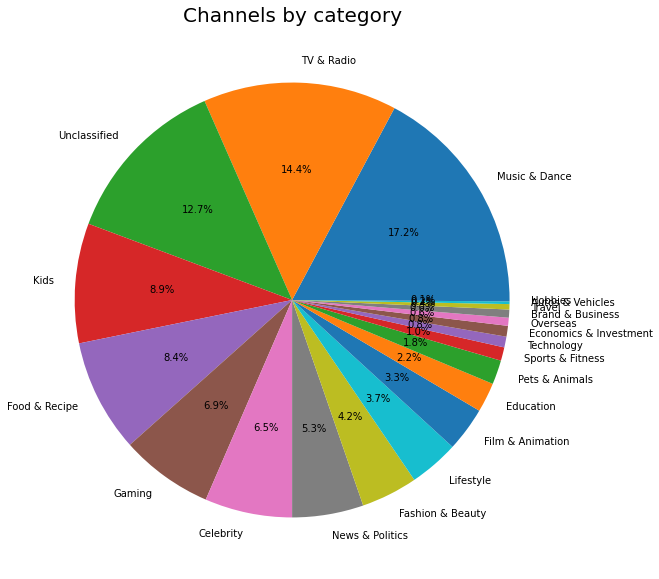

In [27]:
plt.figure(figsize = (30,10))
plt.title("Channels by category", fontsize=20)
plt.pie(pivot_df['category_count'], labels=pivot_df['category'], colors = [color_dict[key] for key in categories], autopct='%1.1f%%')
plt.show()

#### Subscribers by category

In [28]:
pivot1 = pivot_df.sort_values(by='subscriber_sum(K)', ascending=False)
pivot1.head()

,category,subscriber_sum(K),category_count
12,Music & Dance,716730,172
10,Kids,271030,89
17,TV & Radio,242070,144
7,Food & Recipe,186090,84
20,Unclassified,134360,127


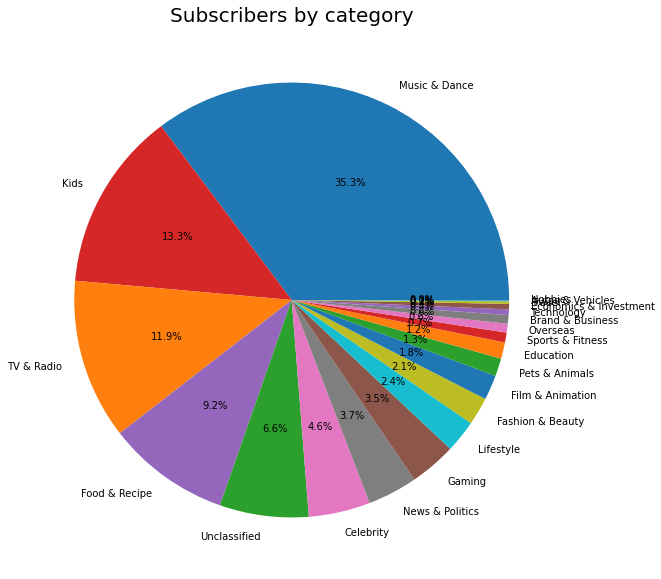

In [29]:
plt.figure(figsize = (30,10))
plt.title("Subscribers by category", fontsize=20)

plt.pie(pivot1['subscriber_sum(K)'], labels=pivot1['category'], colors = [color_dict[key] for key in pivot1.category], autopct='%1.1f%%')
plt.show()

#### Views by category

In [30]:
pivot2 = df.pivot_table(index = 'category', values = 'replaced_view(K)', aggfunc = ['sum','count'])
pivot2.columns = ['view_sum(K)', 'category_count']
pivot2 = pivot2.reset_index()
pivot2 = pivot2.sort_values(by='view_sum(K)', ascending=False)
pivot2.head()

,category,view_sum(K),category_count
12,Music & Dance,252754280,172
17,TV & Radio,167800630,144
10,Kids,142655550,89
13,News & Politics,90081620,53
20,Unclassified,55438730,127


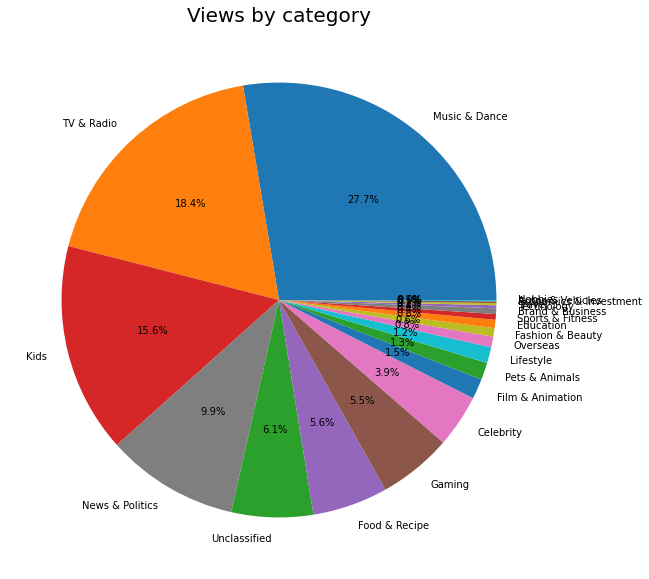

In [31]:
plt.figure(figsize = (30,10))
plt.title("Views by category", fontsize=20)
plt.pie(pivot2['view_sum(K)'], labels=pivot2['category'], colors = [color_dict[key] for key in pivot2.category], autopct='%1.1f%%')
plt.show()

## 5. ANALYZE
### What stories data's telling? Reveal gaps & opportunities

![Pie Chart](./images/piechart.png)

- 'Music & Dance' has three times the number of subscribers than 'TV & Radio' but the number of views is only 1.5 times.


- Soon after BlackPink or BTS' new album is released, news articles say that they have achieved a new record of cumulative views on their music videos on YouTube. Therefore, it is not that the number of views compared to the number of subscribers of 'Music & Dance' is low but that of 'TV & Radio' is high. 


- In other words, many people watch videos of 'TV & Radio' without subscribing to the channel.

In [32]:
df1 = df.loc[df['category'] == 'Music & Dance']
df1['view/subscriber'] = round(df1['replaced_view(K)'] / df1['replaced_subscriber(K)'], 2)
df1[0:10]

,title,category,subscriber,view,video,replaced_subscriber(K),replaced_view(K),view/subscriber
0,BLACKPINK,Music & Dance,7040만,215억3740만,395개,70400,21537400,305.93
1,HYBE LABELS,Music & Dance,6310만,205억6338만,728개,63100,20563380,325.89
2,BANGTANTV,Music & Dance,6170만,141억6115만,"1,647개",61700,14161150,229.52
3,SMTOWN,Music & Dance,2940만,230억6671만,"3,781개",29400,23066710,784.58
5,1MILLION Dance Studio,Music & Dance,2460만,69억4022만,"3,409개",24600,6940220,282.12
6,1theK (원더케이),Music & Dance,2370만,213억8537만,"15,706개",23700,21385370,902.34
7,JYP Entertainment,Music & Dance,2310만,150억5889만,"1,429개",23100,15058890,651.90
8,Mnet K-POP,Music & Dance,1910만,140억0484만,"26,901개",19100,14004840,733.24
9,JFlaMusic,Music & Dance,1740만,35억0639만,281개,17400,3506390,201.52
12,officialpsy,Music & Dance,1530만,88억5136만,91개,15300,8851360,578.52


In [33]:
df2 = df.loc[df['category'] == 'TV & Radio']
df2['view/subscriber'] = round(df2['replaced_view(K)'] / df2['replaced_subscriber(K)'], 2)
df2[0:10]

,title,category,subscriber,view,video,replaced_subscriber(K),replaced_view(K),view/subscriber
10,KBS WORLD TV,TV & Radio,1720만,129억2744만,"54,050개",17200,12927440,751.60
22,MBCkpop,TV & Radio,962만,76억3721만,"41,662개",9620,7637210,793.89
33,M2,TV & Radio,785만,59억8877만,"15,068개",7850,5988770,762.90
44,KBS Kpop,TV & Radio,656만,51억1539만,"30,748개",6560,5115390,779.79
51,스브스케이팝 / SBS KPOP,TV & Radio,620만,42억6271만,"27,576개",6200,4262710,687.53
53,SBS Entertainment,TV & Radio,595만,70억8350만,"218,690개",5950,7083500,1190.50
54,tvN drama,TV & Radio,594만,60억6116만,"37,884개",5940,6061160,1020.40
57,SBS Drama,TV & Radio,579만,61억1900만,"341,738개",5790,6119000,1056.82
75,KBS Entertain,TV & Radio,460만,74억3341만,"102,781개",4600,7433410,1615.96
81,MBCdrama,TV & Radio,448만,50억6565만,"54,948개",4480,5065650,1130.73


- Again, The number of views compared to the number of subscribers is higher in 'TV & Radio' than in 'Music & Dance'.


- To find the reason, I looked into the contents of the top channels of 'TV & Radio.'

![Top3 TV Channel](./images/tvchannel.png)

- Videos uploaded from the top 10 YouTube channels of 'TV & Radio' were mostly music shows or variety shows with Kpop stars.

## 6. SHARE
### Data-driven storytelling

1) Fans of a Kpop star subscribe to the official YouTube channel of the star.

2) Fans choose not to subscribe to the 'TV & Radio' channels because there are many videos of other stars besides the star they like.


3) YouTube will become more user-friendly if it allows subscribers to configure keyword alerts.


4) The most viewed video atm is PINKFONG's 'Baby Shark Dance'--doo doo doo doo doo doo!